# Tutorial 4: SOM

## Topics covered

1. Self Organizing Map (SOM)

## Self Organizing Map

Reference: https://en.wikipedia.org/wiki/Self-organizing_map

A **self-organizing map (SOM)** or **self-organizing feature map (SOFM)** is a type of artificial neural network (ANN) that is trained using unsupervised learning to produce a low-dimensional (typically two-dimensional) representation of the input space of the training samples, called a map, and is therefore a method to do dimensionality reduction.

### Training
The training utilizes competitive learning. When a training example is fed to the network, its Euclidean distance to all weight vectors is computed. The neuron whose weight vector is most similar to the input is called the best matching unit (BMU). The weights of the BMU and neurons close to it in the SOM lattice are adjusted towards the input vector. The magnitude of the change decreases with time and with distance (within the lattice) from the BMU. The update formula for a neuron v with weight vector $W_v(s)$ is:

$$W_v(s+1) = W_v(s) + \theta(u, v, s).\alpha(s).(D(t) - W_v(s))$$

**Algorithm**
1. Randomize the map's nodes' weight vectors
2. Grab an input vector $D(t)$
3. Traverse each node in the map
   - Use the Euclidean distance formula to find the similarity between the input vector and the map's node's weight vector
   - Track the node that produces the smallest distance (this node is the best matching unit, BMU)
4. Update the nodes in the neighborhood of the BMU (including the BMU itself) by pulling them closer to the input vector
    - $W_v(s+1) = W_v(s) + \theta(u, v, s).\alpha(s).(D(t) - W_v(s))$
5. Increase s and repeat from step 2 while $s < \lambda$

**Videos**

https://youtu.be/GdZckTLNqsY?t=6m52s

In [283]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
from matplotlib import rc, animation
from IPython.display import HTML
rc('animation', html='html5')

%matplotlib inline

## SOM algorithm

- We will build SOM algorithm.
- Run it on pixelated image to separate the colors.

**STEP 1**: Generate input image using 6 random colors

(-0.5, 43.5, 43.5, -0.5)

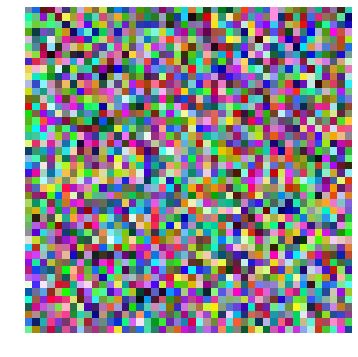

In [284]:
# select six colors as training data
training_data = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0],
                          [255, 0, 255], [0, 255, 255]])
# normalize the training data
training_data = training_data / 255.

# number of rows and columns
n = 44

# Randomly generete the input data
input_data = np.random.rand(n, n, 3)

# plot the image
fig = plt.figure(figsize=(6, 6))
im = plt.imshow(input_data, interpolation='none')
plt.axis('off')

**STEP 2**: Define parameters for SOM algorithm and function to get neighbouring neurons.

In [285]:
# Number of epochs
T = 50

# Initial starting eta
eta0 = 0.8

# flat view of input data for convenience
# note: underlying data is referenced so changing
# `flat_view` change `input_data` as well
flat_view = input_data.reshape(n * n, 3)

def get_neighbouring_neurons(tdata, s):
    """
    Get the neighboring neurons Nc around the neurons which is closest to
    `tdata`.

    Input
    tdata: Training vector s: Width of square for selecting the
    neighbouring neurons

    Return
    All neighboring neurons along with the winning neuron. It returns
    the neurons by reference, thus changing would actually affect the
    `input_data`.
    """
    fi = np.argmin(np.sum((flat_view - tdata)**2, axis=1))
    x, y = np.unravel_index(fi, (n, n))
    return input_data[max(x - s, 0):min(x + s, n),
                      max(y - s, 0):min(y + s, n), :]

**STEP 3**: Run SOM

In [286]:
# Randomly generete the input data
input_data = np.random.rand(n, n, 3)

# flat view of input data for convenience
# note: underlying data is referenced so changing
# `flat_view` change `input_data` as well
flat_view = input_data.reshape(n * n, 3)

def animate(k):
    """
    Function used to visualization of progress made by SOM clustering

    Input
    k: Frame index

    Return
    image data
    """
    global eta
    # since k is index, so we add one to make it current epoch number
    k = k + 1

    # Let say after every second epoch `width` reduces by 1
    # therefore, width can be formulated as below
    width = int(max(22 - np.floor((k - 1) / 2.), 0))

    # Lets not update eta after 90th iteration
    if k < 90:
        eta = eta0 * (1. - k / (T + 1.))

    # SOM logic Iterate training data -> finding winning and neighboring
    # neurons and update their weights
    for tdata in training_data:
        # flat index
        nneurons = get_neighbouring_neurons(tdata, width)
        nneurons[:] = nneurons + eta * (tdata - nneurons)

    im.set_data(input_data)
    return im,

ani = animation.FuncAnimation(fig,
                              animate,
                              frames=T,
                              interval=200,
                              repeat=True)
HTML(ani.to_html5_video())

## Exercise
- Run above algorithm yourself.
- What do you observe?

WRITE YOUR OBSERVATIONS HERE

(-0.5, 43.5, 43.5, -0.5)

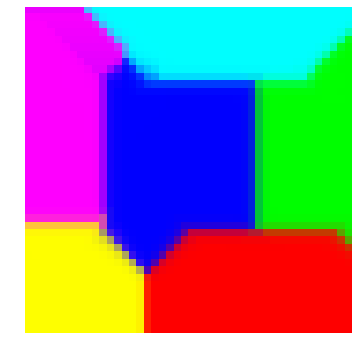

In [287]:
# Randomly generete the input data
input_data = np.random.rand(n, n, 3)

# flat view of input data for convenience
# note: underlying data is referenced so changing
# `flat_view` change `input_data` as well
flat_view = input_data.reshape(n * n, 3)

def run_som_iteration(k):
    global eta

    # since k is index, so we add one to make it current epoch number
    k = k + 1

    # Let say after every second epoch `width` reduces by 1
    # therefore, width can be formulated as below
    width = int(max(22 - np.floor((k - 1) / 2.), 0))

    # Lets not update eta after 90th iteration
    if k < 90:
        eta = eta0 * (1. - k / (T + 1.))

    # SOM logic Iterate training data -> finding winning and neighboring
    # neurons and update their weights
    for tdata in training_data:
        # flat index
        nneurons = get_neighbouring_neurons(tdata, width)
        nneurons[:] = nneurons + eta * (tdata - nneurons)

for i in range(T):
    run_som_iteration(i)

plt.figure(figsize=(6,6))
plt.imshow(input_data)
plt.axis('off')

## Minisom library: Minimalistic library for SOM

We will use *minisom* library for later sections of this tutorial.

![alt text](images/good_news.jpg "Good News")

Github Link: https://github.com/JustGlowing/minisom.git

### EXAMPLE: Color Quantization

Reference: https://github.com/JustGlowing/minisom/blob/master/examples/example_color.py

Will perform same experiment from last tutorial using SOM.

**STEP 1:** Read image

(-0.5, 511.5, 383.5, -0.5)

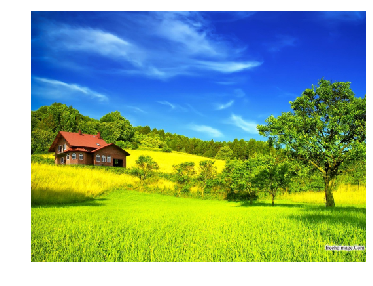

In [288]:
from skimage.io import imread
from skimage.transform import rescale

img = rescale(imread('./images/natural-scene.jpg'), 0.5)
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')

**STEP 2**: Train SOM

In [289]:
from numpy import reshape,flipud,unravel_index,zeros
from minisom import MiniSom

# SOM initialization and training
pixels = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
som = MiniSom(3, 3, 3, sigma=0.1, learning_rate=0.2)
som.random_weights_init(pixels)
starting_weights = som.weights.copy() # saving the starting weights
som.train_random(pixels, 100)

**STEP 3**: Perform quantization of image

In [290]:
print('quantization...')
qnt = som.quantization(pixels)
print('building new image...')
clustered = zeros(img.shape)
for i,q in enumerate(qnt):
    clustered[np.unravel_index(i,dims=(img.shape[0],img.shape[1]))] = q
print('done.')

quantization...
building new image...
done.


**STEP 4**: Visualize quantized colors and the final quantized image

(-0.5, 2.5, 2.5, -0.5)

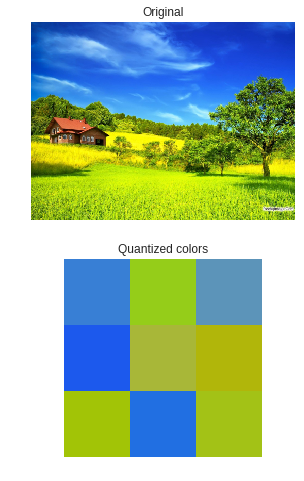

In [291]:
# show the result
plt.figure(figsize=(8,8))
plt.subplot(211)
plt.title('Original')
plt.imshow(img)
plt.axis('off')

plt.subplot(212)
plt.title('Quantized colors')
plt.imshow(som.weights,interpolation='none')
plt.axis('off')

(-0.5, 511.5, 383.5, -0.5)

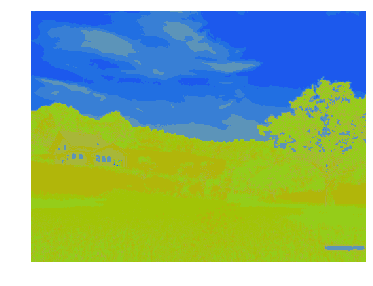

In [292]:
plt.figure(figsize=(6, 6))
plt.imshow(clustered,interpolation='none')
plt.axis('off')

### Exercise: Do the same quantization using KMeans

In [293]:
import matplotlib.patches as patches
from sklearn.cluster import KMeans

def visualize_centroids(centroids):
    fig, (ax1, ax) = plt.subplots(2, 1, figsize=(8,8))
    ax1.imshow(img)
    ax1.axis('off')
    ax.axis('off')
    ax.axis([0, 0.2*len(centroids)+0.2, 0.0, 0.8])
    for i, cen in enumerate(centroids):
        p = patches.Rectangle((0.1+(i*0.2), 0.1), 0.2, 0.6,
                             facecolor=cen)
        ax.add_patch(p)

def perform_kmeans_and_visualize(n_clusters):
    kmns = KMeans(n_clusters=n_clusters)
    kmns.fit(pixels)
    visualize_centroids(kmns.cluster_centers_)

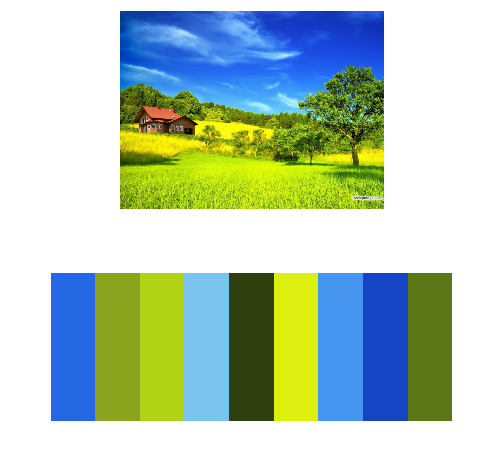

In [294]:
perform_kmeans_and_visualize(9)

(-0.5, 511.5, 383.5, -0.5)

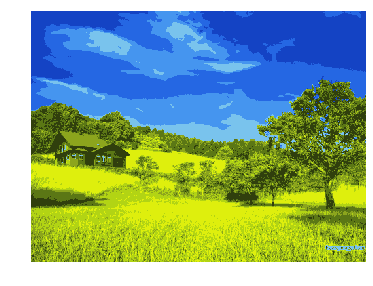

In [295]:
def quantize_image_kmeans(n_colors=2):
    kmns = KMeans(n_clusters=n_colors)
    kmns.fit(pixels)
    return kmns.cluster_centers_[kmns.labels_].reshape(img.shape)

plt.figure(figsize=(6,6))
rec_img = quantize_image_kmeans(9)
plt.imshow(rec_img)
plt.axis('off')

### Compare the resultant image against SOM

(-0.5, 511.5, 383.5, -0.5)

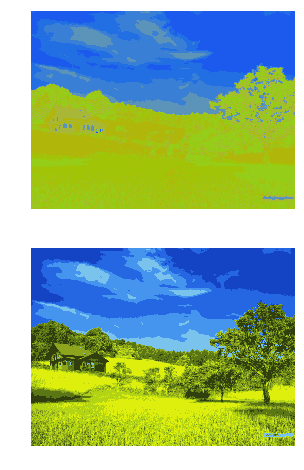

In [296]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.imshow(clustered, interpolation='none')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(rec_img, interpolation='none')
plt.axis('off')

### Example 2: DIGIT dataset

Reference: https://github.com/JustGlowing/minisom/blob/master/examples/example_digits.py

In [297]:
from sklearn import datasets
digits = datasets.load_digits(n_class=4)
data = digits.data
num = digits.target

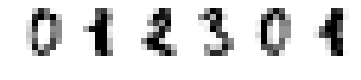

In [298]:
for i in range(6):
    plt.subplot(1, 6, i+1)
    plt.imshow(data[i].reshape(8, 8), interpolation='none')
    plt.axis('off')

In [299]:
from minisom import MiniSom
som = MiniSom(20,20,64,sigma=.8,learning_rate=0.5)
print("Training...")
som.train_random(data,1500) # random training
print("\n...ready!")

Training...

...ready!


(0.0, 20.0, 0.0, 20.0)

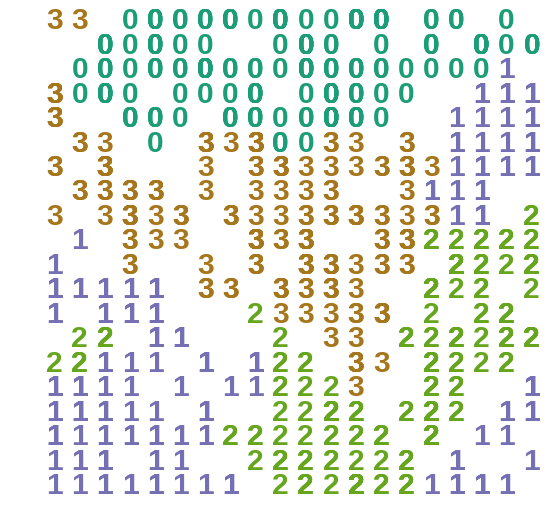

In [300]:
plt.figure(figsize=(9, 9))
for x, t in zip(data, num):  # scatterplot
    w = som.winner(x)
    plt.text(w[0] + .5, w[1] + .5, str(t), color=plt.cm.Dark2(t / 4.),
             fontdict={'weight': 'bold', 'size': 30})
plt.axis([0, som.weights.shape[0], 0, som.weights.shape[1]])
plt.axis('off')

### Exercise: How does it compare with TSNE?

In [301]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X = tsne.fit_transform(data)

In [302]:
X.shape

(720, 2)

(0.0, 21.727464974493053, 0.0, 27.632721396174642)

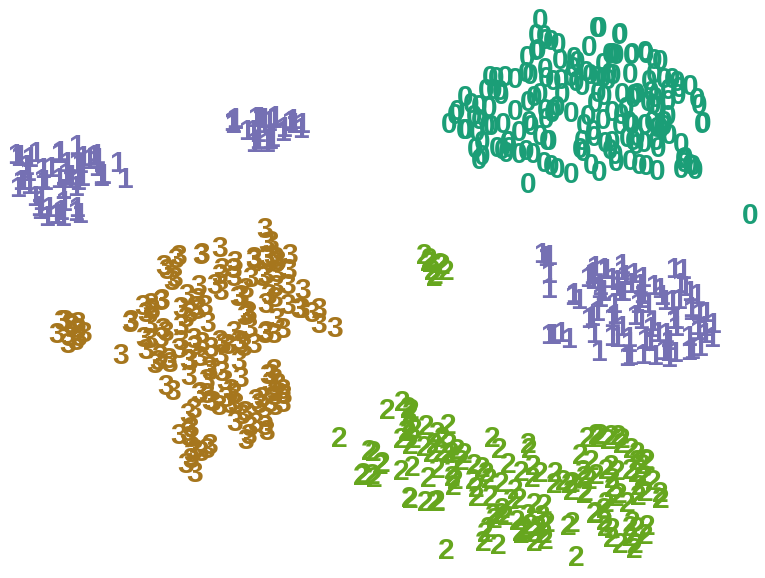

In [303]:
plt.figure(figsize=(6, 5))
for i, t in enumerate(num):
    w = X[i]
    plt.text(w[0] + .5, w[1] + .5, str(t), color=plt.cm.Dark2(t / 4.),
             fontdict={'weight': 'bold', 'size': 30})
plt.axis([0, np.max(X[:, 0]), 0, np.max(X[:, 1])])
plt.axis('off')

### Example 3: Country dataset
https://raw.githubusercontent.com/sjankin/PUBLG088/master/week5/WDI_Data.csv

In [374]:
import pandas as pd

country_data = pd.read_csv('datasets/WDI_Data.csv', encoding = "ISO-8859-1")

In [375]:
cdata2014 = country_data.loc[country_data.Time==2012.0, :]
targets = cdata2014['Country Code']
target_names = cdata2014['Country Name']
data = np.array(cdata2014.iloc[:, 4:])

In [376]:
import sklearn.preprocessing as pre
fdata = np.nan_to_num(data)

fdata.shape

(217, 154)

In [377]:
fdata = pre.minmax_scale(fdata, axis=0)

In [378]:
from minisom import MiniSom
som = MiniSom(5,5,154,sigma=.8,learning_rate=0.5)
print("Training...")
som.train_random(fdata, 1500) # random training
print("\n...ready!")

wmap = {}
for x, t in zip(fdata, target_names):
    w = som.winner(x)
    if w not in wmap:
        wmap[w] = [t]
    else:
        wmap[w].append(t)

Training...

...ready!


In [379]:
groups = []
for k in wmap.keys():
    groups.append(wmap[k])

In [380]:
groups = np.array(groups)
for group in groups:
    for cnt in group:
        if cnt == 'Canada':
            print(group)
            break

['Austria', 'Canada', 'Czech Republic', 'Germany', 'Netherlands', 'Tunisia', 'Ukraine']


## Exercise
Can you perform SOM analysis on NLP example given in last tutorial? Find the most similar news groups?

In [385]:
twdata = np.load('nlp_data_twng.npy').item()
target_names = twdata['target_names']

In [388]:
feats = twdata['features']

from minisom import MiniSom
som = MiniSom(5, 5, 100, sigma=.8, learning_rate=0.5)
print("Training...")
som.train_random(feats, 1500) # random training
print("\n...ready!")

wmap = {}
for x, t in zip(feats, target_names):
    w = som.winner(x)
    if w not in wmap:
        wmap[w] = [t]
    else:
        wmap[w].append(t)

Training...

...ready!


In [407]:
groups = []
groupdfs = []
for k in wmap.keys():
    groups.append(wmap[k])
    group = wmap[k]
    unqs = np.unique(group)
    percs = []
    for unq in unqs:
        count = 100. * len(np.where(np.array(group) == unq)[0])
        percs.append(count/len(group))

    df = pd.DataFrame()
    df['Name'] = unqs
    df['Percentage'] = percs
    groupdfs.append(df.sort_values(by='Percentage', ascending=False))

In [415]:
groupdfs[6].iloc[:5, :]

,Name,Percentage
2,comp.sys.ibm.pc.hardware,22.513089
3,comp.sys.mac.hardware,21.640489
6,rec.autos,18.324607
9,sci.electronics,13.787086
1,comp.os.ms-windows.misc,7.329843
